In [3]:
import numpy as np
from matplotlib import pyplot as plt

In [45]:
#Параметры задачи
a = 2
b = 1
c = -1
alpha = 1
betta = 1
gamma = 1
delta = 1
phi0 = lambda t: np.exp((c-a)*t)*(np.cos(b*t)+np.sin(b*t))
phiL = lambda t: -np.exp((c-a)*t)*(np.cos(b*t)+np.sin(b*t))
psi = lambda x: np.sin(x)
fresult = lambda x,t: np.exp((c-a)*t)*np.sin(x+b*t) 

l = np.pi
N = 10
h = l/(N-1)
K = 100
T = 1
tau = T/K
accurancy = (2,1)
U = []

In [46]:
def plotSlice(f, X, t,q):
    #отрисовка точного решения
    plt.subplots(figsize = (20,10))
    plt.subplot(2, 2, q)
    plt.plot(X, f(X, t), label = 'точное')
    plt.xlabel('Момент времени: %.5f' %(t))
    plt.grid


def Error(U, fR, count):
    X = np.linspace(0, l, N)
    Y = list(map(int, np.linspace(0, U.shape[0] - 1, count)))
    plt.subplot(2, 1, 2)
    plt.plot(Y, list(map(lambda tt: np.max(np.abs(U[tt] - fR(X, tau*tt))), Y)))

def showPostProcess(fresult):
    t=0
    X = np.linspace(0, l, N)
    st=K//3
    print(st)
    for q in range(1,4):
        t=st*(q-1)
        plotSlice(fresult, X, tau * t, q)
        plt.subplot(2, 2, q)
        #отрисовка численного решения
        plt.plot(X, U[t], label = 'численное')
        plt.legend()

In [47]:
def explicitScheme(accurancy,K,N):
    if accurancy == (2,1):
        U = np.zeros((K,N))
        for j in range(0, N):
            U[0][j] = psi(j * h)
            #во все остальные моменты
        for k in range(0, K - 1):
            for j in range(1, N - 1):
                U[k + 1][j] = (tau*a/h**2)*U[k][j - 1] - (2*a*tau/h**2-1)*U[k][j] + (tau*a/h**2)*U[k][j + 1]
            U[k + 1][0] = (phi0(k*tau)-(alpha/h)*U[k+1][1])/(betta-alpha/h)
            U[k + 1][N-1] = (phiL(k*tau)+gamma/h* U[k + 1][N - 1])/(delta+gamma/h)
        return U
    elif accurancy == (2,2):
        pass
    elif accurancy == (3,2):
        pass
    else:
        print("Выберите корректный метод аппроксимации")

In [48]:

def implicitScheme(accurancy):
    if accurancy == (2,1):
        pass
    elif accurancy == (2,2):
        pass
    elif accurancy == (3,2):
        pass
    else:
        print("Выберите корректный метод аппроксимации")

33


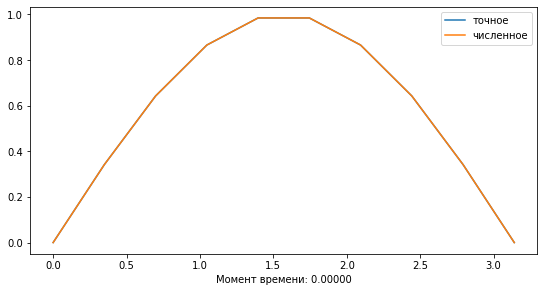

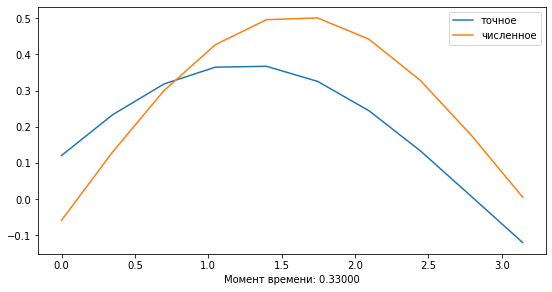

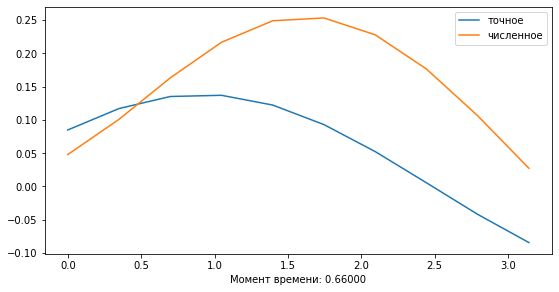

In [49]:
U = explicitScheme(accurancy,K,N)
showPostProcess(fresult)